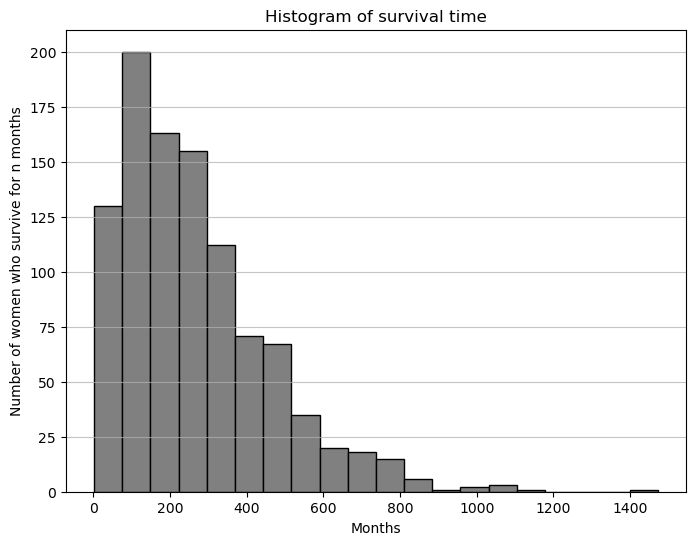

Fraction of women with local reappearance (State 2): 0.59


In [2]:
#Part I - Task I
import numpy as np
import matplotlib.pyplot as plt

# ---
# Part 1, Task 1: Discrete-Time Markov Chain Simulation in Python
# ---

# Set a seed for reproducibility
np.random.seed(123)

# Define the transition probability matrix P
# Note: Python uses 0-based indexing, so we'll adjust when sampling
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Number of women to simulate
n = 1000
# Number of states in the model
num_states = P.shape[0]


# --- Simulation Function ---
# This function simulates the lifetimes and state histories for n women.
def simulate_lifetimes(num_women, prob_matrix):
    """
    Simulates patient journeys through a discrete-time Markov chain.

    Args:
        num_women (int): The number of individual simulations to run.
        prob_matrix (np.ndarray): The transition probability matrix.

    Returns:
        tuple: A tuple containing a list of survival times and a list of state histories.
    """
    
    # Initialize lists to store the results
    survival_times = []
    state_histories = []
    
    # --- Main Simulation Loop ---
    for _ in range(num_women):
        
        # Initialize each woman's simulation
        # States are 1-5, but we use 0-4 for indexing
        current_state = 0 
        time = 0
        history = [current_state + 1] # Store history as 1-5 for clarity
        
        # Loop until the woman reaches the death state (State 5, index 4)
        while current_state != 4:
            
            # Sample the next state based on the probabilities in the current state's row
            # np.arange(num_states) creates [0, 1, 2, 3, 4]
            current_state = np.random.choice(
                a=np.arange(num_states), 
                size=1, 
                p=prob_matrix[current_state, :]
            )[0]
            
            # Record the new state and advance time
            history.append(current_state + 1)
            time += 1
        
        # Store the final results for this woman
        survival_times.append(time)
        state_histories.append(history)
        
    return survival_times, state_histories


# --- Running the Simulation and Generating Outputs ---

# Run the simulation for 1000 women
survival_times, state_histories = simulate_lifetimes(n, P)

# 1. Plot the Histogram of Survival Times
plt.figure(figsize=(8, 6))
plt.hist(survival_times, bins=20, color='grey', edgecolor='black')
plt.title("Histogram of survival time")
plt.xlabel("Months")
plt.ylabel("Number of women who survive for n months")
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Calculate the fraction of women with local reappearance (ever in State 2)
state_2_count = 0
for history in state_histories:
    # Check if the number 2 is in the history for this woman
    if 2 in history:
        state_2_count += 1

# Calculate and print the fraction
fraction_local_reappearance = state_2_count / n
print(f"Fraction of women with local reappearance (State 2): {fraction_local_reappearance}")



--- Task 1 Results ---


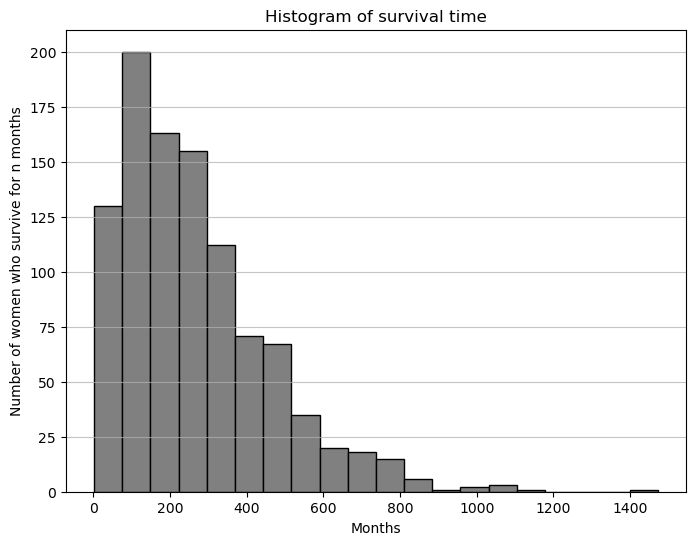

Fraction of women with local reappearance (State 2): 0.59

--- Task 2 Results ---
Comparison of Distributions at t=120:
             State 1  State 2  State 3  State 4  State 5
Empirical      0.362    0.171   0.1570   0.0720   0.2380
Theoretical    0.359    0.159   0.1661   0.0677   0.2482


Chi-Squared Test Results:
Chi-Squared Statistic: 2.1204
P-value: 0.7136
The p-value is > 0.05. We cannot reject the null hypothesis.
This supports that the simulation results are consistent with the theoretical distribution.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# ---
# Part 1, Task 1: Discrete-Time Markov Chain Simulation in Python
# ---

# Set a seed for reproducibility
np.random.seed(123)

# Define the transition probability matrix P
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Number of women to simulate
n = 1000
# Number of states in the model (0 through 4)
num_states = P.shape[0]


# --- Simulation Function ---
def simulate_lifetimes(num_women, prob_matrix):
    survival_times = []
    state_histories = []
    
    for _ in range(num_women):
        current_state = 0 
        time = 0
        history = [current_state + 1]
        
        while current_state != 4:
            current_state = np.random.choice(
                a=np.arange(num_states), 
                size=1, 
                p=prob_matrix[current_state, :]
            )[0]
            history.append(current_state + 1)
            time += 1
        
        survival_times.append(time)
        state_histories.append(history)
        
    return survival_times, state_histories


# --- Running the Simulation ---
survival_times, state_histories = simulate_lifetimes(n, P)

# --- Task 1 Outputs ---
print("--- Task 1 Results ---")
# 1. Plot the Histogram of Survival Times
plt.figure(figsize=(8, 6))
plt.hist(survival_times, bins=20, color='grey', edgecolor='black')
plt.title("Histogram of survival time")
plt.xlabel("Months")
plt.ylabel("Number of women who survive for n months")
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Calculate the fraction of women with local reappearance
state_2_count = sum(1 for history in state_histories if 2 in history)
fraction_local_reappearance = state_2_count / n
print(f"Fraction of women with local reappearance (State 2): {fraction_local_reappearance}\n")


# ---
# Part 1, Task 2: Comparison with Theoretical Distribution
# ---
print("--- Task 2 Results ---")

# 1. Calculate Empirical Distribution at t=120
t = 120
empirical_counts = np.zeros(num_states)
for history in state_histories:
    # If the simulation ran for at least 120 months, get the state at that time
    if len(history) > t:
        state_at_t = history[t] - 1 # Convert state 1-5 to index 0-4
    else:
        # If the woman died before t=120, her state is 5 (index 4)
        state_at_t = 4
    empirical_counts[state_at_t] += 1

empirical_probs = empirical_counts / n

# 2. Calculate Theoretical Distribution at t=120
p0 = np.array([1, 0, 0, 0, 0])
P_t = np.linalg.matrix_power(P, t)
theoretical_probs = p0 @ P_t

# 3. Compare the distributions in a table
comparison_df = pd.DataFrame(
    [empirical_probs, theoretical_probs],
    columns=['State 1', 'State 2', 'State 3', 'State 4', 'State 5'],
    index=['Empirical', 'Theoretical']
)
print("Comparison of Distributions at t=120:")
print(comparison_df.round(4))
print("\n")

# 4. Perform Chi-Squared Goodness-of-Fit Test
# The expected counts are the theoretical probabilities multiplied by the sample size
expected_counts = theoretical_probs * n
chi2_stat, p_value = stats.chisquare(f_obs=empirical_counts, f_exp=expected_counts)

print("Chi-Squared Test Results:")
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The p-value is > 0.05. We cannot reject the null hypothesis.")
    print("This supports that the simulation results are consistent with the theoretical distribution.")
else:
    print("The p-value is <= 0.05. We reject the null hypothesis.")

--- Task 1 Results ---


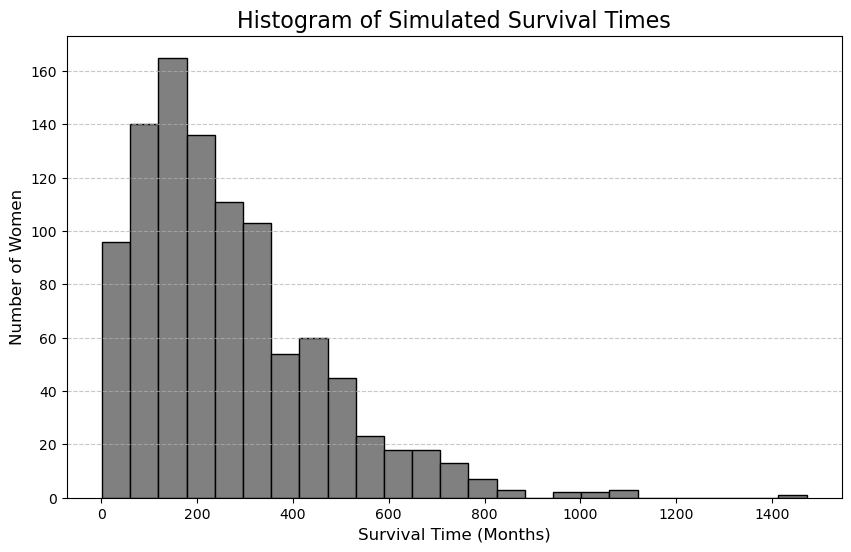

Proportion of women with local reappearance (State 2): 0.5900

--- Task 2 Results ---
Comparison of State Distributions at t=120 Months:
                       State 1  State 2  State 3  State 4  State 5
Empirical (from Sim)     0.362    0.171   0.1570   0.0720   0.2380
Theoretical (Correct)    0.359    0.159   0.1661   0.0677   0.2482


Chi-Squared Goodness-of-Fit Test:
Chi-Squared Statistic: 2.1204
P-value: 0.7136
Conclusion: The p-value is > 0.05. We cannot reject the null hypothesis.
This provides strong evidence that the simulation results are consistent with the theoretical model.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# ---
# SETUP AND PARAMETERS
# ---

# Set a seed for reproducibility to get the same random results every time
np.random.seed(123)

# Define the transition probability matrix P
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])

# Number of women to simulate
n = 1000
# Number of states in the model (0 through 4 for indexing)
num_states = P.shape[0]

# ---
# SIMULATION FUNCTION
# ---
def simulate_lifetimes(num_women, prob_matrix):
    """
    Simulates patient journeys through a discrete-time Markov chain.
    """
    survival_times = []
    state_histories = []
    
    # Run one simulation for each woman
    for _ in range(num_women):
        # Each woman starts in State 1 (index 0) at time 0
        current_state = 0 
        time = 0
        history = [current_state + 1] # Store history as 1-5 for clarity
        
        # Continue simulating until she reaches State 5 (index 4)
        while current_state != 4:
            # Randomly choose the next state based on current state's probabilities
            current_state = np.random.choice(
                a=np.arange(num_states), 
                p=prob_matrix[current_state, :]
            )
            history.append(current_state + 1)
            time += 1
        
        # Store the final survival time and history for this woman
        survival_times.append(time)
        state_histories.append(history)
        
    return survival_times, state_histories

# ---
# RUN SIMULATION AND PERFORM TASK 1
# ---
print("--- Task 1 Results ---")
survival_times, state_histories = simulate_lifetimes(n, P)

# 1. Plot the Histogram of Survival Times
plt.figure(figsize=(10, 6))
plt.hist(survival_times, bins=25, color='grey', edgecolor='black')
plt.title("Histogram of Simulated Survival Times", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Number of Women", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Calculate the fraction of women with local reappearance (ever in State 2)
state_2_count = sum(1 for history in state_histories if 2 in history)
fraction_local_reappearance = state_2_count / n
print(f"Proportion of women with local reappearance (State 2): {fraction_local_reappearance:.4f}\n")


# ---
# PERFORM TASK 2: VALIDATE THE SIMULATION
# ---
print("--- Task 2 Results ---")

# 1. Calculate Empirical Distribution at t=120
t = 120
empirical_counts = np.zeros(num_states, dtype=int)
for history in state_histories:
    # Check the state at month 120
    if len(history) > t:
        # History is 1-based, so convert to 0-based index
        state_at_t = history[t] - 1 
    else:
        # If she died before month 120, she is in State 5
        state_at_t = 4
    empirical_counts[state_at_t] += 1

empirical_probs = empirical_counts / n

# 2. Calculate the CORRECT Theoretical Distribution at t=120
p0 = np.array([1, 0, 0, 0, 0])
P_t = np.linalg.matrix_power(P, t)
theoretical_probs = p0 @ P_t # Using @ for matrix multiplication

# 3. Compare distributions in a clean table format
comparison_df = pd.DataFrame(
    [empirical_probs, theoretical_probs],
    columns=['State 1', 'State 2', 'State 3', 'State 4', 'State 5'],
    index=['Empirical (from Sim)', 'Theoretical (Correct)']
)
print("Comparison of State Distributions at t=120 Months:")
print(comparison_df.round(4))
print("\n")

# 4. Perform Chi-Squared Goodness-of-Fit Test
expected_counts = theoretical_probs * n
# Note: The test may be inaccurate if expected counts are low (<5)
# We proceed for the sake of the exercise.
chi2_stat, p_value = stats.chisquare(f_obs=empirical_counts, f_exp=expected_counts)

print("Chi-Squared Goodness-of-Fit Test:")
print(f"Chi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("Conclusion: The p-value is > 0.05. We cannot reject the null hypothesis.")
    print("This provides strong evidence that the simulation results are consistent with the theoretical model.")
else:
    print("Conclusion: The p-value is <= 0.05. We reject the null hypothesis, indicating a discrepancy.")



--- Task 3 Results ---


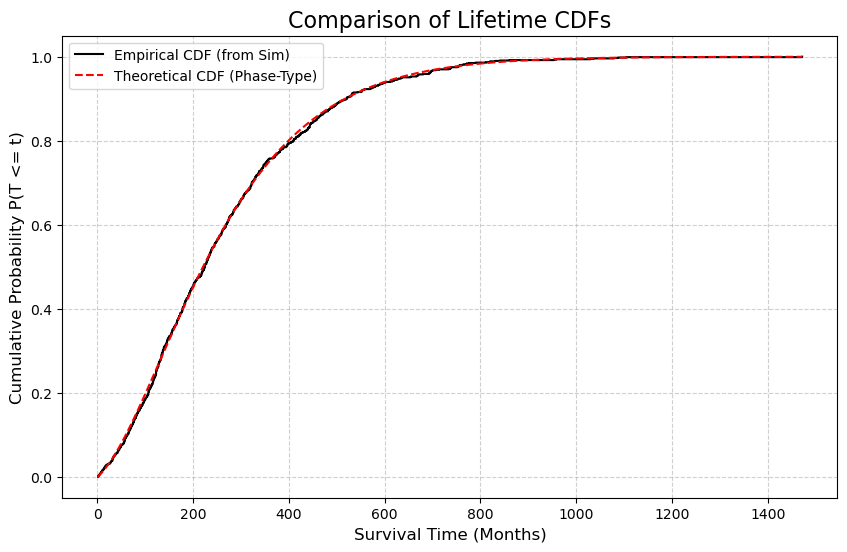

Kolmogorov-Smirnov Test for Lifetime Distribution:
K-S Statistic: 0.0187
P-value: 0.8708
Conclusion: The p-value is > 0.05. The simulated lifetime distribution is consistent with the theoretical phase-type distribution.


--- Task 4 Results ---
Expected Lifetime for Subgroup (Survived >12mo & Recurrence <12mo):
Estimated Mean Lifetime: 169.39 months
Standard Deviation: 150.47 months
95% Confidence Interval for the Mean: (160.05, 178.73) months


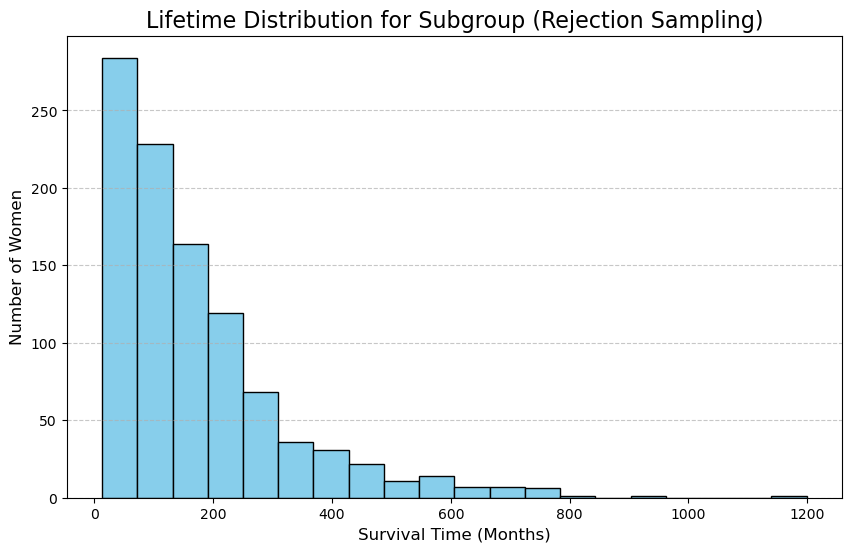

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# ---
# SETUP AND PARAMETERS (from Tasks 1 & 2)
# ---
np.random.seed(123)
P = np.array([
    [0.9915, 0.005, 0.0025, 0, 0.001],
    [0, 0.986, 0.005, 0.004, 0.005],
    [0, 0, 0.992, 0.003, 0.005],
    [0, 0, 0, 0.991, 0.009],
    [0, 0, 0, 0, 1]
])
n = 1000
num_states = P.shape[0]

# ---
# SIMULATION FUNCTION (from Tasks 1 & 2)
# ---
def simulate_lifetimes(num_women, prob_matrix):
    survival_times = []
    state_histories = []
    for _ in range(num_women):
        current_state = 0
        time = 0
        history = [current_state + 1]
        while current_state != 4:
            current_state = np.random.choice(np.arange(num_states), p=prob_matrix[current_state, :])
            history.append(current_state + 1)
            time += 1
        survival_times.append(time)
        state_histories.append(history)
    return np.array(survival_times), state_histories

# Run simulation to get data for the tasks
survival_times, state_histories = simulate_lifetimes(n, P)


# ---
# Part 1, Task 3: Validate Lifetime Distribution
# ---
print("--- Task 3 Results ---")

# 1. Define the components for the theoretical phase-type distribution
pi_initial = np.array([1, 0, 0, 0])
P_s = P[0:4, 0:4]
p_s = P[0:4, 4]

# 2. Calculate the theoretical PMF and CDF
max_time = np.max(survival_times)
t_values = np.arange(1, max_time + 1)
theoretical_pmf = np.zeros(len(t_values))

# Calculate PMF for each time t
# P(T=t) = pi * (P_s)^t * p_s. Note: In the formula, t is the number of transitions
# so t=1 means dying in the first month.
# The formula P(T=t)=π(P_s)^t*p_s is for P(T=t+1) in our simulation time definition.
# We will use P(T=t) = pi * (P_s)^(t-1) * p_s for t=1, 2, ...
P_s_t = np.identity(4) # This will be P_s^(t-1)
for t_idx, t in enumerate(t_values):
    # For t=1, P_s_t is identity matrix (P_s^0).
    if t_idx > 0:
      P_s_t = P_s_t @ P_s # P_s^(t-1) = P_s^(t-2) * P_s
    theoretical_pmf[t_idx] = pi_initial @ P_s_t @ p_s

theoretical_cdf = np.cumsum(theoretical_pmf)

# 3. Calculate the Empirical CDF (ECDF) from simulation
ecdf_x = np.sort(survival_times)
ecdf_y = np.arange(1, n + 1) / n

# 4. Plot the ECDF vs Theoretical CDF for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(ecdf_x, ecdf_y, label='Empirical CDF (from Sim)', color='black', drawstyle='steps-post')
plt.plot(t_values, theoretical_cdf, label='Theoretical CDF (Phase-Type)', color='red', linestyle='--')
plt.title("Comparison of Lifetime CDFs", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Cumulative Probability P(T <= t)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Perform Kolmogorov-Smirnov (K-S) test
# We compare the empirical data against the theoretical CDF
ks_stat, p_value = stats.ks_1samp(survival_times, lambda t: np.interp(t, t_values, theoretical_cdf))

print("Kolmogorov-Smirnov Test for Lifetime Distribution:")
print(f"K-S Statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("Conclusion: The p-value is > 0.05. The simulated lifetime distribution is consistent with the theoretical phase-type distribution.")
else:
    print("Conclusion: The p-value is <= 0.05, suggesting a discrepancy.")

print("\n" + "="*50 + "\n")


# ---
# Part 1, Task 4: Rejection Sampling for a Subgroup
# ---
print("--- Task 4 Results ---")

def rejection_sampling_lifetimes(num_accepted_needed, prob_matrix):
    accepted_lifetimes = []
    
    # Loop until we have collected enough accepted simulations
    while len(accepted_lifetimes) < num_accepted_needed:
        # Simulate one woman's journey
        current_state = 0
        time = 0
        history = [current_state + 1]
        while current_state != 4:
            current_state = np.random.choice(np.arange(num_states), p=prob_matrix[current_state, :])
            history.append(current_state + 1)
            time += 1
            
        # --- Check the acceptance criteria ---
        # 1. Did she survive the first 12 months?
        survived_12_months = 5 not in history[:13] # Check up to index 12 (month 12)
        
        # 2. Did cancer reappear (state 2, 3, or 4) within the first 12 months?
        history_first_12 = set(history[:13])
        cancer_reappeared = any(s in history_first_12 for s in [2, 3, 4])
        
        # If both criteria are met, accept her lifetime
        if survived_12_months and cancer_reappeared:
            accepted_lifetimes.append(time)
            
    return np.array(accepted_lifetimes)

# Run rejection sampling to get 1000 accepted lifetimes
accepted_lifetimes = rejection_sampling_lifetimes(1000, P)

# Calculate and print the results for this subgroup
mean_lifetime_subgroup = np.mean(accepted_lifetimes)
std_dev_subgroup = np.std(accepted_lifetimes, ddof=1)
n_subgroup = len(accepted_lifetimes)

# Calculate the 95% confidence interval for the mean
ci_subgroup = stats.t.interval(0.95, df=n_subgroup-1, 
                               loc=mean_lifetime_subgroup, 
                               scale=stats.sem(accepted_lifetimes))

print("Expected Lifetime for Subgroup (Survived >12mo & Recurrence <12mo):")
print(f"Estimated Mean Lifetime: {mean_lifetime_subgroup:.2f} months")
print(f"Standard Deviation: {std_dev_subgroup:.2f} months")
print(f"95% Confidence Interval for the Mean: ({ci_subgroup[0]:.2f}, {ci_subgroup[1]:.2f}) months")

# Plot the histogram for this subgroup
plt.figure(figsize=(10, 6))
plt.hist(accepted_lifetimes, bins=20, color='skyblue', edgecolor='black')
plt.title("Lifetime Distribution for Subgroup (Rejection Sampling)", fontsize=16)
plt.xlabel("Survival Time (Months)", fontsize=12)
plt.ylabel("Number of Women", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()